# MTH5001: Introduction to Computer Programming 2018/19

## Final Report Project: "Networks"

### Instructions:

First, please type your name and student number into the Markdown cell below:

**Name:** Ibrahim Lunat 

**Student number:** 170442725 

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. (You should create new code and/or Markdown cells in the appropriate places, so that your answers are clearly visible.)

Your code must be well documented. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation). You should also use sensible variable names, so that your code is as clear as possible. If your code works but is unduly difficult to read, then you may lose marks.

For this project, you will need to use the Python package [NetworkX](https://networkx.github.io/) extensively. However, to test your coding skills, in certain questions you will be restricted to using only specific functions. 
These restrictions are made clear below (see questions 4 and 8).

### Submission deadline:

You must submit your work via QMPlus (to the "Final Report Project" assignment in the "Final Report Project" section).

The submission deadline is **11:55pm on Monday 29 April, 2019**. Late submissions will be penalised according to the School's [guidelines](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=89105).

Your lecturers will respond to project-related emails until 5:00pm on Friday 26 April, 2019, only. You should aim to have your project finished by this time.

### Marking:

The project is worth 70% of your final mark for this module.

The total number of marks available for the project is 100. 

Attempt all parts of all questions.

When writing up your project, good writing style is even more important than in written exams. 
According to the [advice in the student handbook](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87786),

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**

### Plagiarism warning:

Your work will be tested for plagiarism, which is an assessment offence, according to the [School's policy on Plagiarism](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87787). In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the plagiarism detection software "Turnitin" to help us assess how much of work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work accordingly before finalising your submission.

You may summarise relevant parts of books, online notes, or other resources, as you see fit.
However, you must use your own words as far as possible (within reason, e.g. you would not be expected to change the wording of a well-known theorem), and you **must** [reference](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87793) any sources that you use. Similarly, if you decide to work with other students on parts of the project, then you **must** write up your work individually. You should also note that most of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).

## Background information

In this project you will learn about a field of mathematics called [graph theory](https://en.wikipedia.org/wiki/Graph_theory). 
A **graph** (or **network**) is simply a a collection of **nodes** (or **vertices**), which may or may not be joined by **edges**. 
(Note that this is not the same as the 'graph' of a function.)

Graphs can represent all sorts of real-world (and, indeed, mathematical) objects, e.g. 

* social networks (nodes represent people, edges represent 'friendship'),
* molecules in chemistry/physics (nodes represent atoms, edges represent bonds),
* communications networks, e.g. the internet (nodes represent computers/devices, edges represent connections).

In this project we will only consider **undirected** graphs (see the above Wikipedia link for a definition).

Conventiently, Python has a package, called [NetworkX](https://networkx.github.io/), for constructing and analysing graphs. 
Let's look at an example. 
Below we create the famous [Petersen graph](https://en.wikipedia.org/wiki/Petersen_graph) and use some basic NetworkX functions to learn a bit about it.

In [1]:
# import NetworkX and other useful packages
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import networkx as nx

# create the Petersen graph, storing it in a variable called "PG"
PG = nx.petersen_graph()

Before we doing anything else, it would make sense to draw the graph, to get an idea of what it looks like. 
We can do this using the NetworkX function `draw_networkx` (together with our old favourtie, matplotlib).

C:\Users\Louie Lunat\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


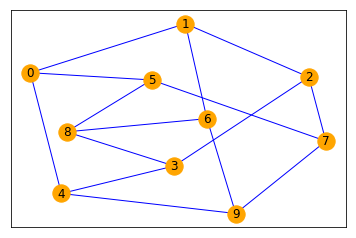

In [2]:
nx.draw_networkx(PG, node_color = 'orange', edge_color = 'blue', with_labels=True)
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
import scipy
def distance_matrix(G):
    A = nx.adjacency_matrix(G)
    A = A.toarray()
    return scipy.sparse.csgraph.dijkstra(A,directed=False,unweighted=True)
#print(distance_matrix(G))
print(distance_matrix(PG))

[[0. 1. 2. 2. 1. 1. 2. 2. 2. 2.]
 [1. 0. 1. 2. 2. 2. 1. 2. 2. 2.]
 [2. 1. 0. 1. 2. 2. 2. 1. 2. 2.]
 [2. 2. 1. 0. 1. 2. 2. 2. 1. 2.]
 [1. 2. 2. 1. 0. 2. 2. 2. 2. 1.]
 [1. 2. 2. 2. 2. 0. 2. 1. 1. 2.]
 [2. 1. 2. 2. 2. 2. 0. 2. 1. 1.]
 [2. 2. 1. 2. 2. 1. 2. 0. 2. 1.]
 [2. 2. 2. 1. 2. 1. 1. 2. 0. 2.]
 [2. 2. 2. 2. 1. 2. 1. 1. 2. 0.]]


We can see that the graph has 10 nodes, labelled by the integers $0,1,\ldots,9$. 
It is also possible to label nodes with other data types, most commonly strings, but we won't do that in this project. 
The nodes of a graph can be accessed via the method `nodes()`:

In [4]:
PG.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

You can convert this to a Python list if you need to:

In [5]:
list(PG.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

This (hopefully) makes it clear that the node labels do in fact have type `int`, at least in our example.
You can also see from the picture that the graph has 15 edges. 
These can be accessed using the method `edges()`:

In [6]:
PG.edges()

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)])

Again, you can convert this to a list if you need to (try it), and you will see that the elements of the list are tuples. In either case, if you compare the output with the picture, it should become clear what it means, i.e. two nodes labelled $i$ and $j$ are joined by an edge if and only if the pair $(i, j)$ appears in `PG.edges()`. 

In [7]:
list(PG.edges)

[(0, 1),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 6),
 (2, 3),
 (2, 7),
 (3, 4),
 (3, 8),
 (4, 9),
 (5, 7),
 (5, 8),
 (6, 8),
 (6, 9),
 (7, 9)]

So far we haven't said much about how graphs are related to **mathematics**. It turns out that a graph can be completely defined by its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). This is simply a matrix $A$ defined as follows: 

* $A$ has size $n \times n$, where $n$ is the number of nodes in the graph;
* if the nodes labelled $i$ and $j$ form an edge, then the $(i,j)$-entry of $A$ is $1$; if they don't form an edge, the $(i,j)$-entry of $A$ is $0$.

This idea is the foundation of [algebraic graph theory](https://en.wikipedia.org/wiki/Algebraic_graph_theory), a field of mathematics used to study graphs by analysing certain matrices.

Not surprisingly, you can compute the adjacency matrix of a graph using an appropriate NetworkX function. Let's do this for the Petersen graph:

In [8]:
A = nx.adjacency_matrix(PG)

In [9]:
print(A)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 6)	1
  (2, 1)	1
  (2, 3)	1
  (2, 7)	1
  (3, 2)	1
  (3, 4)	1
  (3, 8)	1
  (4, 0)	1
  (4, 3)	1
  (4, 9)	1
  (5, 0)	1
  (5, 7)	1
  (5, 8)	1
  (6, 1)	1
  (6, 8)	1
  (6, 9)	1
  (7, 2)	1
  (7, 5)	1
  (7, 9)	1
  (8, 3)	1
  (8, 5)	1
  (8, 6)	1
  (9, 4)	1
  (9, 6)	1
  (9, 7)	1


Note that if you print this 'adjacency matrix' (try it), it doesn't actually look much like a matrix. This is because it doesn't have type `numpy.ndarray` like the matrices/arrays we've worked with in class:

In [10]:
type(nx.adjacency_matrix(PG))

scipy.sparse.csr.csr_matrix

However, you can convert it to a `numpy.ndarray` by calling the method `toarray()`:

In [11]:
A = A.toarray()

In [12]:
type(A)

numpy.ndarray

After doing this, the adjacency matrix looks like you would expect, so you can use all the usual `numpy.linalg` functions on it:

In [13]:
print(A)

[[0 1 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 1 0 0]]


Make sure that you understand what all these $0$'s and $1$'s mean: the $(i,j)$-entry of the adjacency matrix is $1$ if and only if the edges labelled $i$ and $j$ form an edge in the graph; otherwise, it is $0$. For example (remembering that Python starts counting from $0$, not from $1$): the $(0,4)$ entry is $1$, and in the picture above we see that nodes $0$ and $4$ form an edge; on the other hand, the $(1,7)$ entry is $0$, and accordingly nodes $1$ and $7$ don't form an edge.

You will be working with matrices related to graphs quite a lot in this project, so before you begin you should make sure that you understand what the code we've given you above is doing. 
You may also like to work through the official [NetworkX tutorial](https://networkx.github.io/documentation/stable/tutorial.html) before attempting the project, bearing in mind that not everything in the tutorial is relevant to the project. 
(Alternatively, Google for another tutorial if you don't like that one.)

**A final remark before we get to the project itself:**

You can rest assured that the graphs we consider this project all have the following nice properties:

* They are **connected**. This means that for every pair of nodes $i$ and $j$, there is a 'path' of edges joining $i$ to $j$. For example, the Petersen graph is connected, e.g. the nodes labelled $6$ and $7$ do not form an edge, but we can still reach node $7$ from node $6$ via the edges $(6,9)$ and $(9,7)$.
* They are **simple**. This means that there is never an edge from a node to itself.

You may come across these terms when you are researching the relevant mathematics for various parts of the project, so you should know what they mean.

## The project

As we have already mentioned, in this project you will make extensive use of the Python package [NetworkX](https://networkx.github.io/), which allows you to create and analyse graphs. 
You are expected to read the relevant parts of the NetworkX documentation, or otherwise learn how to use whatever Python functions you need to complete the project. 
However, the mini-tutorial which we have provided above should be enough to get you started.

You will also need to research and summarise some mathematics related to graphs, and to use your findings to write certain pieces of code 'from scratch', instead of of using NetworkX functions. 
In these cases (questions 4 and 8), it is **strongly recommended** that you use NetworkX to check your answers.

You should structure your report as follows:

### Part I: Data import and preliminary investigation [10 marks]

You have been provided with a Python file called **"data.py"** on QMPlus, which you should save in the same directory as this Jupyter notebook.
This file contains a function `create_graph` which constructs a random graph that you will be analysing throughout the project. 
By following the instructions in question 1 (below), you will create a graph that is unique to you, i.e. no two students will have the same graph.

**1. [5 marks]** Execute the following code cell to create your graph, storing it in a variable called `G` (you can change the variable name if you like, but we recommend leaving it as it is). You **must** replace the number "123456789" with your 9-digit student number. 

*Important note: If you do not do this correctly, you will score 0 for this question, and if you are found to have used the same input as another student (rather than your individual student number), then your submission will be reviewed for plagiarism.*

In [14]:
from data import create_graph
G = create_graph(170442725)

**2. [5 marks]** Draw your graph, and calculate how many nodes and edges it has. 

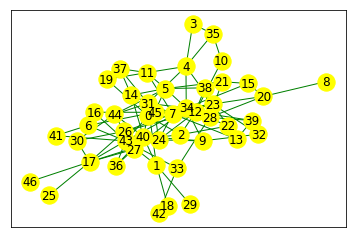

In [15]:
Position = nx.spring_layout(G, weight = None)
#Code adapted from https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
nx.draw_networkx(G, Position, node_color = 'yellow', edge_color = 'green', with_labels = True)
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
Nodes_of_my_graph = list((G.nodes()))
print("My graph has", len(Nodes_of_my_graph), "nodes.")
#This code returns how many nodes I have in my graph
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.DiGraph.number_of_nodes.html

My graph has 47 nodes.


In [17]:
Edges_of_my_graph = list((G.edges()))
print("My graph has", len(Edges_of_my_graph), "edges.")
#This code returns how many edges I have in my graph
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.DiGraph.number_of_nodes.html

My graph has 95 edges.


### Part II: Distance matrices and shortest paths [30 marks]

Many properties of graphs can be analysed by using matrices/linear algebra. 
The rest of your report will involve researching/summarising some of the relevant mathematics, and writing/using Python code to analyse certain properties of your graph from Part I. 
As explained above, you are allowed to summarise information from books and/or web pages, but you must use your own words and clearly reference any sources you use.

**3. [10 marks]** Explain what a "path" between two nodes in a graph is, and what the "distance" between two nodes is. Explain also what the "distance matrix" of a graph is, and how it can be computed using the adjacency matrix. 
Here you should discuss arbitrary (undirected, simple, connected) graphs, not your specific graph from Part I.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

## Graph Theory Concepts

To define a path in a graph, we have to first define what a graph is. A graph (V,E) is defined as a set of vertices (or nodes) V = {$v_1,...,v_n$} and a set of edges E = {($v_i,v_j$) | for $v_i,v_j$ in V} which connects two vertices. In a directed graph the elements within E are ordered pairs, wheras in an undirected graph the pairs within V ($v_i,v_j$) are unordered. 

**Definition of a path between two nodes**

A path between two nodes $v_i$ and $v_j$ is a sequence of connected edges ($v_a,v_b$),($v_b,v_c$),...,($v_x,v_y$),($v_y,v_z$) without any repetition. A graph is connected if a path exists between any two elements in V and a weighted graph is a graph which has a non-negative weight attached to each edge ($v_i,v_j$) in E. For a simple graph - a graph which has no weight, is undirected and has no loops - the path length is simply the number of edges in the path. 

**Definition of the distance between two nodes**

The distance between any two nodes in a graph is the length of the shortest path between them. When the edges have an associated weight attached to it, the distance between two nodes is the smallest total of weights in any path from node $i$ to node $j$.

**Definition of the distance matrix**

The distance matrix is a square matrix consisting of all the graph distances from vertex $v_i$ to vertex $v_j$, and the adjacency matrix is a matrix with rows and columns labelled by the vertices in a graph. If the nodes $v_i$ and $v_j$ are directly connected, the corresponding entry will have a 1, otherwise the entry will have a 0. For a simple graph, the adjacency matrix will have 0's on the diagonal. For an undirected graph, the adjacency matrix is symmetric. 

**How the distance matrix can be computed using the adjacency matrix**

The distance matrix can be computed from the adjacency matrix by calculating walks. The adjacency matrix essentially shows all the nodes $v_i$ which are directly connected to $v_j$ by displaying a 1, if two nodes are not connected the matrix will show a zero. 

Therefore, to compute the distance matrix from the adjacency matrix we multiply the adjacency matrix by itself (Adjacency matrix * Adjacency matrix). This returns the matrix of walk 2, which shows all the $v_i$ and $v_j$ with a distance of two between them. We then continue to work out the walks by multiplying the adjacency matrix by itself until we have worked out how each node $v_i$ is connected to $v_j$. This process is then repeated until all the 0's in the matrix have been accounted for, i.e. we have worked out a distance between each node.

However, once we have computed our final matrix this will not be our distance matrix, rather it will be a matrix displaying how many walks we have had to take to reach that matrix. To then use this to compute the distance matrix we have to refer back to each walk we have computed. If the first adjacency matrix displays a 1 this is the shortest path between $v_i$ and $v_j$. We then look at the next matrix computed, i.e. the matrix corresponding to the matrix of walk 2. If two nodes which initially displayed 0, now display a number then the shortest path between them is 2. We then repeat this process until we have worked out a distance matrix.

**Bibliography:**

1) A. Phips, H. Larry and D.S. Geert, editors. G.D. Soete, J.D Carroll. *Clustering And Classification.* World Scientific, 1996.<br>
2) M.R.T. Dale. *Applying Graph Theory in Ecological Research.* Cambridge University Press, 2017.<br>
3) http://mathworld.wolfram.com/SimpleGraph.html<br>
4) http://mathworld.wolfram.com/GraphDistanceMatrix.html<br>
5) http://mathworld.wolfram.com/AdjacencyMatrix.html<br>
6) https://qmplus.qmul.ac.uk/pluginfile.php/1227562/mod_resource/content/3/CW4-2018.pdf

**4. [10 marks]** Write a function `distance_matrix` which computes the distance matrix of a graph. 
Your function should return a matrix, represented as an array of type `numpy.ndarray`, of the same shape as the adjacency matrix of the graph. 
You may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but you **must not use any other NetworkX functions**.

In [18]:
import scipy
def distance_matrix(G):
    Adjacency_matrix = nx.adjacency_matrix(G)
    #This computes the adjacency matrix using the in-built networkx function
    Adjacency_matrix = Adjacency_matrix.toarray()
    #This changes the adjacency matrix into a matrix form we can use 
    return scipy.sparse.csgraph.dijkstra(Adjacency_matrix, unweighted = True, directed = False)
    #This implements the dijkstra's algorithm using Fibonacci Heaps.
    #I've used Dijkstra’s algorithm to determine the shortest path from one node in my graph to every other node, as my nodes are all connected.
    #My graph has no specified direction and has no weight attached to it's edges. Hence, why I've had to implement this into my code. 
    #Code adapted from https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csgraph.dijkstra.html
    #https://medium.com/basecs/finding-the-shortest-path-with-a-little-help-from-dijkstra-613149fbdc8e
print("The distance matrix for my graph is:")
print()
print(distance_matrix(G))

The distance matrix for my graph is:

[[0. 2. 1. ... 2. 2. 3.]
 [2. 0. 2. ... 2. 3. 3.]
 [1. 2. 0. ... 3. 2. 3.]
 ...
 [2. 2. 3. ... 0. 2. 3.]
 [2. 3. 2. ... 2. 0. 3.]
 [3. 3. 3. ... 3. 3. 0.]]


In [19]:
#Test this function for the Petersen Graph
#print(distance_matrix(PG))

In [20]:
#Test my distance matrix
Distance_matrix_using_nx = nx.floyd_warshall_numpy(G)
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.dense.floyd_warshall_numpy.html
print("I am testing my distance matrix by comparing it with the in-built networkx distance matrix.")
print()
print(Distance_matrix_using_nx == distance_matrix(G))
#Code adapted from Week 5 lecture notes https://qmplus.qmul.ac.uk/pluginfile.php/1549880/mod_resource/content/1/week5.pdf

I am testing my distance matrix by comparing it with the in-built networkx distance matrix.

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


**5. [5 marks]** Using your function from Question 4, find a pair of nodes $(i,j)$ in your graph from Part I with the property that the distance from $i$ to $j$ is maximal amongst all pairs of nodes in the graph. 

Note: This means that for every *other* pair of nodes $(i',j')$, the distance from $i'$ to $j'$ is less than or equal to the distance from $i$ to $j$.

In [21]:
print("The maximal distance between any two nodes in my graph is", nx.diameter(G),".")
#This networkx function tells me the diameter of my graph which is the greatest distance between any two nodes in my graph.
#M.R.T. Dale. Applying Graph Theory in Ecological Research. Cambridge University Press, 2017.
#Code adapted from https://networkx.github.io/documentation/networkx-1.7/reference/generated/networkx.algorithms.distance_measures.diameter.html

The maximal distance between any two nodes in my graph is 5 .


In [22]:
#print(nx.eccentricity(G))
#This in-built networkx function shows the maximum distance from a vertex to all the other vertices in my graph.
My_lst = []
for i in range (len(Nodes_of_my_graph)):
    for j in range (len(Nodes_of_my_graph)):
        if distance_matrix(G)[i,j] == nx.diameter(G):
            #defining a for loop to access all the entries in the distance matrix.
            My_lst.append([i,j])
            #if the distance matrix is equal to 5 (my largest distance between any two vertices) I append my empty list to return all the vertices with a distance of 5 between them.
#print(My_lst)
print(My_lst[0], "are a pair of nodes in my graph which have the maximal distance", nx.diameter(G), "between them.")
#As I have made my code into a list by appending the code so that I can access the first element of my list, this gives me a pair of nodes with the maximum distance of 5 between them.
#Therefore, the distance between the nodes 3 and 25 is more than or equal to the distance between every other node (i,j).

[3, 25] are a pair of nodes in my graph which have the maximal distance 5 between them.


In [23]:
#Testing the function for the PG graph.
#nx.eccentricity(PG)
My_lst_PG = []
for i in range(9):
    for j in range(9):
        if distance_matrix(PG)[i,j] == 2.0:
            My_lst_PG.append([i,j])
#print(My_lst_PG[0])

**6. [5 marks]** Find a shortest path between your nodes from Question 5, i.e. one with the shortest possible length, and re-draw your graph so that this path is clearly visible. 
You should use one colour for the nodes and edges in the path, and a different colour for all other nodes and edges. 

Hint: You should be able to find a NetworkX function that computes a shortest path.

In [24]:
Shortest_path = nx.bidirectional_shortest_path(G, 3, 25)
#This networkx function shows the shortest path between nodes 3 and 25 in my graph.
print("The nodes which connect the vertices 3 and 25 are", Shortest_path)
#https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.bidirectional_shortest_path.html#networkx.algorithms.shortest_paths.unweighted.bidirectional_shortest_path

The nodes which connect the vertices 3 and 25 are [3, 4, 34, 43, 17, 25]


I have drawn the shortest path between nodes 3 and 25 in green.


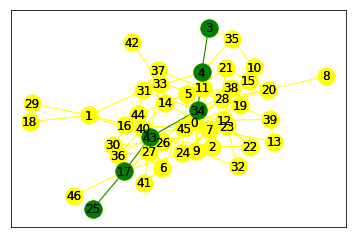

In [25]:
Position = nx.spring_layout(G, weight = None)
#Code adapted from https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
nx.draw_networkx(G, Position, node_color = 'yellow', edge_color = 'yellow', with_labels = True)
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
nx.draw_networkx(G, Position, nodelist = [3, 4, 34, 43, 17, 25], node_color = 'green', edgelist = [(3,4), (4,34), (34,43), (43,17), (17,25)], edge_color = 'green', with_labels = True)
#The nodelist I've inputted is the shortest path between nodes 3 and 25 and the edgelist I've computed myself through logic.
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
plt.xticks([])
plt.yticks([])
print("I have drawn the shortest path between nodes 3 and 25 in green.")
plt.show()

In [26]:
#Testing the function for the PG graph.
#Shortest_path_PG = nx.bidirectional_shortest_path(PG, 0, 2)
#print(Shortest_path_PG)
#Position_PG = nx.spring_layout(PG, weight = 1)
#nx.draw_networkx(PG, Position_PG, node_color = 'red', edge_color = 'red', with_labels = True)
#nx.draw_networkx(PG, Position_PG, nodelist = [0, 2], node_color = 'yellow', edgelist = [(0,1), (1,2)], edge_color = 'yellow', with_labels = True)
#plt.xticks([])
#plt.yticks([])
#plt.show()

#### Part III: Laplacian matrices and spanning trees [30 marks]

So far you have learned about two matrices associated with a graph: the adjacency matrix, and the distance matrix. Now you will study a third matrix: the Laplacian.

**7. [10 marks]** Explain what the "degree" of a node in a graph is, what the "Laplacian matrix" of a graph is, what a "spanning tree" of a graph is, and how the Laplacian matrix can be used to calculate the number of spanning trees in a graph. 
Here, again, you should discuss arbitrary (undirected, simple, connected) graphs, not your specific graph from Part I.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

**Definition of the degree of a node in a graph**

The degree of a node is the number of edges incident to the node. When a graph is complete every pair of distinct nodes will have an edge attached to it. In a directed graph the elements within E are ordered pairs, wheras in an undirected graph the pairs within V ($v_i,v_j$) are unordered. Therefore, in a directed graph the edges are directed, wheras in an undirected graph the edges are not directed. 

**Definition of Laplacian Matrix**

Let G be a graph on n vertices labelled 1,...,n. The Laplacian matrix of G is the n x n matrix L = [$l_i$,$_j$] where

$$l_i,_j=\begin{cases}-1&\text{if $i\neq j$ and $i$ and $j$ are adjacent,}\\0&\text{if $i\neq j$ and $i$ is not adjacent to j,}\\d_i &\text{if $i=j$.}\end{cases}$$

The Laplacian matrix can be computed using the degree matrix and the adjacency matrix. The formula is given by Laplacian matrix = Degree matrix - Adjacency matrix.


**Definition of a spanning tree of a graph**


To define a spanning tree, we first have to define what a tree is.  A tree is a connected simple graph without cycles, where a cycle is defined as a sequence of distinct adjacent nodes that begin and end at the same vertex. A tree can also be defined as a finite set of nodes such that:

1. There is a specially designated node called root 
2. The remaining nodes are partitioned into disjoint sets called subtrees of the root.

Knowing this we can now define a spanning tree of a graph G as a tree that is a spanning subgraph of G. A spanning tree is not unique.

**How the Laplacian matrix can be used to compute the number of spanning trees**

We can compute the number of spanning trees from the Laplacian matrix by using Kirchoff's theorem. We accomplish this by calculating the co-factor for any element in our Laplacian matrix. The result we obtain is the total number of spanning trees. The formula to compute this is :

$C_i$$_j$ = $(-1)^i$$^+$$^j$ * |$M_i$$_j$| 

where |$M_i$$_j$| is the determinant of the Laplacian matrix after removing row i and column j from the Laplacian matrix. We can use any co-factor to compute the number of spanning trees as the result obtained will always be the same.

We can also compute the number of spanning trees using the eigenvalues of the laplacian matrix. The number of spanning trees of a graph is 

$G = \frac 1 n \lambda_1\lambda_2...\lambda_n$ $_-$$_1$


**Bibliography:**

1) A. Phips, H. Larry and D.S. Geert, editors. *Clustering And Classification.* World Scientific, 1996.<br>
2) M.R.T. Dale. *Applying Graph Theory in Ecological Research.* Cambridge University Press, 2017.<br>
3) H.T. Lau. *A Java Library of Graph Algorithms and Optimization.* CRC Press, 2006.<br>
4) R.C. Wilson. *A study of spectra for comparing graphs and trees.*  Science Direct, 2008.<br> 
5) https://www.cs.cmu.edu/~adamchik/21-127/lectures/graphs_1_print.pdf<br>
6) http://www.people.vcu.edu/~gasmerom/MAT131/graphs.html<br>
7) https://www.geeksforgeeks.org/total-number-spanning-trees-graph/<br>
8) https://en.wikipedia.org/wiki/Kirchhoff%27s_theorem<br>
9) https://www.geeksforgeeks.org/difference-between-graph-and-tree/<br>
10) https://www.geeksforgeeks.org/total-number-spanning-trees-graph/

**8. [10 marks]** Write a function `number_of_spanning_trees` which takes as input a graph $G$ and returns the number of spanning trees in $G$. You may use the NetworkX function `adjacency_matrix` to compute the adjacency matrix of the input graph, but you **may not use any other NetworkX functions**.

Note: You will probably need to compute the determinant of a certain matrix somewhere in your code. If you use the function `numpy.linalg.det` then your determinant will only be computed approximately, i.e. to a certain numerical precision. This is fine; you will not lose any marks if your code is otherwise correct.

In [27]:
Adjacency_matrix = nx.adjacency_matrix(G)
Adjacency_matrix = Adjacency_matrix.toarray()
print(Adjacency_matrix)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
Degree_matrix = np.zeros((len(G.nodes()),len(G.nodes())))
for i in range(len(Nodes_of_my_graph)):
    for j in range(len(Nodes_of_my_graph)):
    #This code makes a degree matrix with the size based on how many nodes our graph has.
        Degree_matrix [j,j] = len(list(G.edges(j)))
        Degree_matrix [i,i] = len(list(G.edges(i)))
        #This code assigns every diagonal in our degree matrix to show the number of edges attached to that vertex.
print(Degree_matrix)

[[6. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 0. 0.]
 [0. 0. 0. ... 0. 7. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [29]:
My_degree_matrix_diagonals = Degree_matrix.diagonal()
#Code adapted from https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.diagonal.html
Addition_of_each_row = Adjacency_matrix.sum(axis = 0)
#Code adapted from https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.sum.html
print("I am checking whether my degree matrix has computed the correct number of edges.")
print()
print(My_degree_matrix_diagonals == Addition_of_each_row)
#Code adapted from Week 5 lecture notes https://qmplus.qmul.ac.uk/pluginfile.php/1549880/mod_resource/content/1/week5.pdf
#By summing the rows of the adjacency matrix I can compute the number of edges for each node.
#As the adjacency matrix displays a 1 for each node it is connected to, summing each row of the adjacency matrix will work out how many edges each node has.

I am checking whether my degree matrix has computed the correct number of edges.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


In [30]:
def number_of_spanning_trees(G):
    Laplacian_matrix = Degree_matrix - Adjacency_matrix
    #I have used kirchoff's theorem to work out the co-factor of the Laplacian matrix 
    Delete_one_row_of_Laplacian = np.delete(Laplacian_matrix, (0), axis=0)
    #I have deleted the first row of the laplacian matrix.
    #Code adapted from https://stackoverflow.com/questions/3877491/deleting-rows-in-numpy-array
    Delete_one_column_of_Laplacian = np.delete(Delete_one_row_of_Laplacian, (0), axis=1)
    #I have now deleted the first column of the laplacian column matrix taking into consideration the deleted row above.
    #Code adapted from https://stackoverflow.com/questions/3877491/deleting-rows-in-numpy-array
    return abs(np.linalg.det(Delete_one_column_of_Laplacian))
    #This computes the determinant of the matrix which in turn works out the number of spanning trees.
    #Used the code mentioned in the question to work out the determinant.
#Code adapted from https://stackoverflow.com/questions/3877491/deleting-rows-in-numpy-array
#Used this website to understand the theory and help me compute the co-factor https://www.geeksforgeeks.org/total-number-spanning-trees-graph/

**9 [5 marks]** Use your function from Question 8 to calculate the number of spanning trees in your graph from Part I.

In [31]:
print("I have", int(number_of_spanning_trees(G)), "spanning trees in my graph")
#print("I have", number_of_spanning_trees(G), "spanning trees in my graph")

I have 146928383060710899712 spanning trees in my graph


**10 [5 marks]** Find a minimal spanning tree of your graph from Part I, i.e. one with the smallest possible number of edges. Re-draw your graph in such a way that this spanning tree is clearly visible. You should use one colour for the edges in the spanning tree, and a different colour for all other edges. 

Hint: You should be able to find a NetworkX function that computes a minimal spanning tree.

In [32]:
Min_spanning_tree = nx.minimum_spanning_tree(G)
#This networkx function determines the minimum spanning tree.
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.mst.minimum_spanning_tree.html
print("This networkx function returns a spanning tree. One of the conditions is satisfied where all the nodes have been listed.")
print()
print(Min_spanning_tree.nodes())

This networkx function returns a spanning tree. One of the conditions is satisfied where all the nodes have been listed.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


In [33]:
print("This networkx function returns a spanning tree. Further conditions are satisfied as the edges do not form a cycle and the edges are not disconnected.")
print()
print(sorted(Min_spanning_tree.edges()))
#This prints out all the edges of the minimum spanning tree.
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.mst.minimum_spanning_tree.html

This networkx function returns a spanning tree. Further conditions are satisfied as the edges do not form a cycle and the edges are not disconnected.

[(0, 2), (0, 19), (0, 28), (0, 34), (0, 40), (0, 43), (1, 18), (1, 29), (1, 31), (1, 40), (2, 12), (2, 22), (3, 4), (3, 35), (4, 11), (4, 23), (4, 34), (5, 11), (5, 14), (5, 21), (5, 38), (5, 44), (5, 45), (6, 41), (6, 45), (7, 13), (7, 23), (7, 24), (7, 26), (8, 20), (9, 24), (9, 32), (10, 35), (11, 37), (12, 39), (15, 20), (15, 21), (16, 45), (17, 25), (17, 26), (17, 27), (17, 30), (17, 46), (27, 36), (28, 33), (33, 42)]


I have drawn my minimum spanning tree in yellow, the green lines displayed in the graph are from the edges connecting two vertices which are not included in my minimum spanning tree.


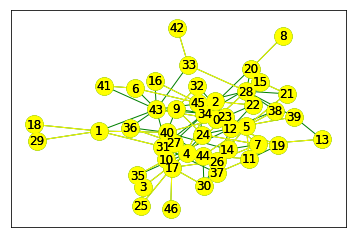

In [34]:
Position = nx.spring_layout(G)
nx.draw_networkx(G, Position, node_color = 'green', edge_color = 'green', with_labels=True)
nx.draw_networkx(G, Position, nodelist = Min_spanning_tree.nodes, node_color = 'yellow', edgelist = sorted(Min_spanning_tree.edges()), edge_color = 'yellow', with_labels=True)
#This networkx function draws the minimum spanning tree using it's in-built function, and by using it's ability to understand what the nodes and edges in the minimum spanning tree is. As illustrated above.
plt.xticks([])
plt.yticks([])
print("I have drawn my minimum spanning tree in yellow, the green lines displayed in the graph are from the edges connecting two vertices which are not included in my minimum spanning tree.")
plt.show()

### Part IV: Eigenvalues and triangles [30 marks]

By now you have seen that certain matrices associated with a graph can tell us a lot about the structure of the graph. 
In this final part of the project, you will investigate this further, by learning how eigenvalues can be used to reveal even more information about graphs.

**11. [5 marks]** Explain what a "triangle" in a graph is, and quote a formula for calculating the number of triangles in a graph from the eigenvalues of the adjacency matrix.

Note: You do **not** need to give any proofs, but you must reference any material you use, as explained in the plagiarism warning above.

**Definition of a traingle in a graph**

A triangle can be considered a walk of length 3 which starts and ends at the same vertex $v_i.$ 
We can compute the number of triangles in an undirected graph in two ways. 

1. $\frac 1 6$ trace($A^3$)
2. $\frac 1 6$ $\sum\limits_{i=1}^n\ \lambda_i^3$


The trace is defined as the sum of the diagonals and $A^3$ is defined as the the adjacency matrix cubed. Therefore, the a($_i$,$_j$) entry of $A^3$ equals the number of distinct walks of length 3 which start at vertex $v_i$ and end at vertex $v_i$. As we are computing walks every triangle will be counted 6 times, for this reason we have to divide each formula by $\frac 1 6$.
Using this information we can also compute the number of triangles using eigenvalues as we know trace(A) = $\sum\limits_{i=1}^n\ \lambda_i$. 


**Bibliography:**

1) Y. Changyu. *Triangle Counting in Large Networks* University of Minnesota, 2012.<br>
2) https://www.geeksforgeeks.org/number-of-triangles-in-a-undirected-graph/

**12. [5 marks]** Calculate the number of triangles in your graph from Part I, using the formula discussed in question 11. Your answer **must** be an integer.

Hint: What is the "trace" of a matrix and how is it related to the eigenvalues?

In [35]:
Adjacency_matrix = nx.adjacency_matrix(G)
Adjacency_matrix = Adjacency_matrix.toarray()
#print(Adjacency_matrix)

In [36]:
eval_Adjacency_matrix, evec_Adjacency_matrix = la.eig(Adjacency_matrix)
print("The first step to compute the number of triangles is to cube the eigenvalues, but in order to do this I have to first work out the eigenvalues.") 
print()
print("The list of my eigenvalues which have been computed from my adjacency matrix.")
print()
print(list(eval_Adjacency_matrix))
#This code computes the eigenvalues of the adjacency matrix and prints it as a list.
#Code adapted from Week 9 lecture notes file:///C:/Users/Louie%20Lunat/Downloads/week9%20(1).pdf

The first step to compute the number of triangles is to cube the eigenvalues, but in order to do this I have to first work out the eigenvalues.

The list of my eigenvalues which have been computed from my adjacency matrix.

[5.298655478746906, -3.9941899145708524, -3.5579889674775873, -3.38263230766745, -3.2988612694693726, 3.4176152798711157, 3.3377002550583126, 3.2446089718763425, -2.8147488748578606, 2.6524214129625214, -2.5410751001077423, 2.4982043803955474, -2.2039556290608573, 2.1373156395301107, 2.0844686029195523, 1.8654258689716552, -1.9347684328155548, 1.6300122020200627, -1.7375348449537045, 1.5007684701846877, -1.6103771005223573, -1.452997737775241, -1.388926848269738, -1.3168528080768958, -1.2232794834879432, 1.2628340406205558, 1.2018635989597788, -1.0088349388173468, -0.8913390594646227, -0.8118198163558925, -0.7682949904618915, -0.6906844913577955, -0.522943270966626, 1.021379213563229, 0.9488005310071115, 0.8836923950935112, 0.7440958633465952, 0.6637622392622535, 0.

In [37]:
My_lst=[]
for x in (list(eval_Adjacency_matrix)):
    My_lst.append(x**3)
    #I have adapted my code to cube all of my eigenvalues.
    #Code adapted from Week 6 lecture notes https://qmplus.qmul.ac.uk/pluginfile.php/1553643/mod_resource/content/1/week6.pdf
print("The list of my eigenvalues cubed is:")
print()
print(My_lst)
#To ensure all the eigenvalues have been cubed

The list of my eigenvalues cubed is:

[148.7637259345959, -63.721520788381646, -45.04159811914802, -38.70475988589009, -35.8998105094893, 39.918068412384265, 37.18279187786709, 34.1575800056974, -22.300723991169857, 18.66068474454909, -16.407881156310616, 15.591356308500217, -10.705539066065743, 9.763510350212414, 9.057035583135566, 6.491334444122756, -7.242474567347655, 4.3308442593693846, -5.245665196649465, 3.380189831659371, -4.1762141336948355, -3.0675723489344944, -2.6794034917898144, -2.2835561902825128, -1.8305309482849768, 2.013904351581975, 1.736063256782424, -1.0267396745050148, -0.7081557969310909, -0.5350309980677596, -0.4535070098808885, -0.3294876291808701, -0.14300912094183763, 1.0655186248210937, 0.8541315363447622, 0.6900862158057833, 0.41198999595273533, 0.2924405733199664, 0.1433238777586248, -0.04450712021591646, -0.00757400245850361, 0.0332332398183434, 0.013708721099274377, 0.00329597264470619, 0.00044362760043861396, 2.745205345365375e-50, -3.673375335756817e-49

In [38]:
Sum_of_eigenvalues_cubed = int(sum(My_lst))
print(" The next step is to sum all of my cubed eigenvalues, this yields the sum of the eigenvalues to be", Sum_of_eigenvalues_cubed,".")
#Code adapted from https://stackoverflow.com/questions/11344827/summing-elements-in-a-list

 The next step is to sum all of my cubed eigenvalues, this yields the sum of the eigenvalues to be 72 .


In [39]:
#The formula then states divide the sum of the eigenvalues cubed by 6.
print("The final step is to divide the sum of the cubed eigenvalues by 6.")
print("Therefore, there are", int(Sum_of_eigenvalues_cubed/6), "triangles in my graph.")

The final step is to divide the sum of the cubed eigenvalues by 6.
Therefore, there are 12 triangles in my graph.


**13. [10 marks]** Write a function `all_triangles` which finds all of the triangles in a graph. Use your function to count the number of triangles in your graph, and compare with your answer to question 12. (The two answers should, of course, be the same.)

Note: You will need to use your function in the next question, so you should think carefully about what kind of data structure you want it to output.

In [40]:
def all_triangles():
    vertices_which_are_connected = nx.enumerate_all_cliques(G)
    #A clique is defined as a graph where every vertex is adjacent to every other vertex.
    triangles = list(x for x in vertices_which_are_connected if len(x)==3)
    #print(triangles)
    #The code will define a triangle if three nodes are directly connected to each other, hence, forming a triangle if the length of the clique is 3. 
    return (triangles)
#code adapted from https://stackoverflow.com/questions/1705824/finding-cycle-of-3-nodes-or-triangles-in-a-graph
#https://courses.cs.washington.edu/courses/cse527/01au/oct25/oct25.html
print("These nodes", all_triangles(), "form triangles in my graph.")
#This prints the nodes of every triangle in my graph.

These nodes [[0, 2, 43], [0, 34, 43], [2, 12, 22], [3, 4, 35], [4, 23, 34], [4, 31, 34], [6, 41, 43], [12, 24, 45], [15, 20, 34], [17, 26, 27], [17, 26, 30], [26, 30, 44]] form triangles in my graph.


In [41]:
print(len(all_triangles()))
#To test my code worked for question 12

12


**14. [10 marks]** Re-draw your graph from Part I once more, so that all of its triangles are clearly visible. 
You should use one colour for the edges that appear in at least one triangle, and a different colour for all other edges.

This graph draws all of my triangles in green.


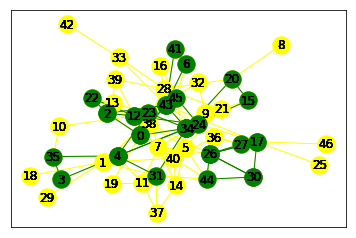

In [42]:
Position = nx.spring_layout(G, weight = None)
#Code adapted from https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
nx.draw_networkx(G, Position, node_color = 'yellow', edge_color = 'yellow', with_labels=True)
nx.draw_networkx(G, Position, nodelist = [0, 2, 43], node_color = 'green', edgelist = [(0,2), (2,43), (43,0)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [0, 34, 43], node_color = 'green', edgelist = [(0,34), (34,43), (43,0)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [2, 12, 22], node_color = 'green', edgelist = [(2,12), (12,22), (22,2)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [3, 4, 35], node_color = 'green', edgelist = [(3,4), (4,35), (35,3)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [4, 23, 34], node_color = 'green', edgelist = [(4,23), (23,34), (34,4)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [4, 31, 34], node_color = 'green', edgelist = [(4,31), (31,34), (34,4)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [6, 41, 43], node_color = 'green', edgelist = [(6,41), (41,43), (43,6)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [12, 24, 45], node_color = 'green', edgelist = [(12,24), (24,45), (45,12)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [15, 20, 34], node_color = 'green', edgelist = [(15,20), (20,34), (34,15)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [17, 26, 27], node_color = 'green', edgelist = [(17,26), (26,27), (27,17)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [17, 26, 30], node_color = 'green', edgelist = [(17,26), (26,30), (30,17)], edge_color = 'green', with_labels = True)
nx.draw_networkx(G, Position, nodelist = [26, 30, 44], node_color = 'green', edgelist = [(26,30), (30,44), (44,26)], edge_color = 'green', with_labels = True)
#I have used the networkx function to draw each triangle. The previous question listed all the nodes which form a triangle and I inputted the edgelist based on the nodes that form the triangle.
#Code adapted from https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
print("This graph draws all of my triangles in green.")
plt.xticks([])
plt.yticks([])
plt.show()